# Projeto: Seleção de Modelos de Machine Learning
<hr>

#### Explorando dados para analisar uso medidas de desempenho de modelos de ML<br>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score, roc_auc_score, silhouette_score, davies_bouldin_score, mutual_info_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df_btransf = pd.read_csv('bloodtransf-1.csv')
df_diab = pd.read_csv('diabetes_numeric-1.csv')
df_wine = pd.read_csv('wine-1.csv')

> #### Respondendo às perguntas


### Pergunta 1:
Sobre o número de atributos da base de regressão, marque a alternativa CORRETA: **bold text**

In [3]:
df_diab.shape

(43, 3)

A base tem 3 atributos.

### Pergunta 2:
Sobre o número de instâncias da base de classificação, marque a alternativa CORRETA:

In [4]:
df_btransf.shape

(748, 5)

A base tem 748 instâncias.

### Pergunta 3:
Sobre a base de clusterização, marque a alternativa CORRETA:

In [5]:
df_wine["class"].value_counts()

,count
class,
2,71
1,59
3,48


In [6]:
df_wine.shape

(178, 14)

A base tem 178 instâncias divididas em 3 classes.

### Pergunta 4:
Sobre dados faltantes, marque a alternativa CORRETA:

In [7]:
df_btransf.isna().sum()

,0
V1,0
V2,0
V3,0
V4,0
Class,0


In [8]:
df_diab.isna().sum()

,0
age,0
deficit,0
c_peptide,0


In [9]:
df_wine.isna().sum()

,0
class,0
Alcohol,0
Malic_acid,0
Ash,0
Alcalinity_of_ash,0
Magnesium,0
Total_phenols,0
Flavanoids,0
Nonflavanoid_phenols,0
Proanthocyanins,0


Nenhuma base tem dados faltantes.

### Pergunta 5:
Em relação à modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica r2:

In [10]:
df_diab.head()

,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0


In [11]:
X = df_diab[['age', 'deficit']]
y = df_diab[['c_peptide']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=5762)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [12]:
# Cálculo do R²
r2 = r2_score(y_test, y_pred)

print("O r2 encontrado é aproximadamente ", round(r2,2))

O r2 encontrado é aproximadamente  0.02


### Pergunta 6:
Em relação à modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica MAE:

In [13]:
# Cálculo do MAE
mae = mean_absolute_error(y_test, y_pred)

print("O MAE encontrado é aproximadamente ", round(mae,2))

O MAE encontrado é aproximadamente  0.53


### Pergunta 7:

Em relação à modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica MSE:

In [14]:
# Cálculo do MSE
mse = mean_squared_error(y_test, y_pred)

print("O MSE encontrado é aproximadamente ", round(mse,2))

O MSE encontrado é aproximadamente  0.44


### Pergunta 8:

Em relação à modelagem utilizando o SVM, marque a alternativa CORRETA sobre a métrica acurácia:

In [15]:
df_btransf.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [16]:
X = df_btransf[['V1', 'V2', 'V3', 'V4']]
y = df_btransf['Class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=5762)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [17]:
accuracy = accuracy_score(y_test, y_pred)

print("A acurácia encontrada é aproximadamente ", round(accuracy, 2))

A acurácia encontrada é aproximadamente  0.81


### Pergunta 9:

Em relação à modelagem utilizando o SVM, marque a alternativa CORRETA sobre a métrica f1

In [18]:
baseline_test = np.random.choice([0, 1], size=len(y_test))

f1 = f1_score(y_test, baseline_test, average='weighted')

print("A f1 encontrada é aproximadamente ", round(f1, 2))

A f1 encontrada é aproximadamente  0.47


### Pergunta 10:

Em relação à modelagem utilizando o SVM, marque a alternativa CORRETA sobre a métrica AUROC:


In [19]:
auc = roc_auc_score(y_test, y_pred)

print("A AUROC encontrada é aproximadamente ", round(auc, 2))

A AUROC encontrada é aproximadamente  0.59


### Pergunta 11:

Em relação à modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre o número de clusters:


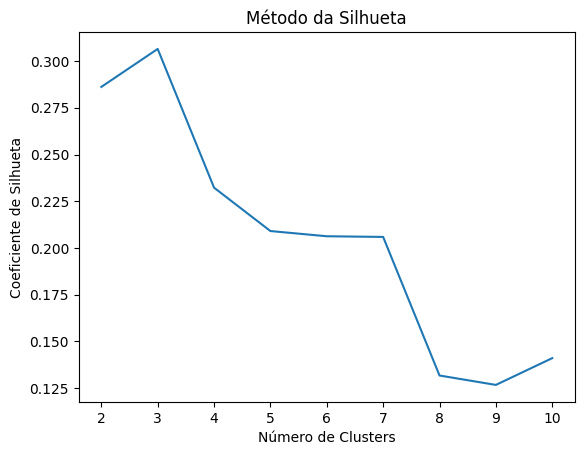

In [20]:
X = df_wine
scaler = StandardScaler()
X = scaler.fit_transform(X)

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=5762)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)


plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta')
plt.show()

In [21]:
print("O número de clusters mais adequado para o problema é 3")

O número de clusters mais adequado para o problema é 3


### Pergunta 12:

Em relação à modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre a métrica Coeficiente de Silhueta:

In [22]:
kmeans = KMeans(n_clusters=3, random_state=5762)
labels = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, labels)
print("O coeficiente de silhueta encontrado é aproximadamente: ", round(silhouette_avg,2))

O coeficiente de silhueta encontrado é aproximadamente:  0.31


In [23]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=5762)
labels = kmeans.fit_predict(X)

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(X, labels)
print("O Davies-Bouldin Score encontrado é aproximadamente", round(db_score, 2))

O Davies-Bouldin Score encontrado é aproximadamente 1.32


### Pergunta 13:

 Em relação à modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre a métrica Davies-Bouldin Score:

### Pergunta 14:

Em relação à modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre a métrica Mutual information:

In [24]:
df_wine.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
X = df_wine.drop('class', axis=1)
y_real = df_wine['class']

kmeans = KMeans(n_clusters=3, random_state=5762)
labels = kmeans.fit_predict(X)

mi_score = mutual_info_score(labels, y_real)

print("O Mutual information encontrado é aproximadamente:", round(mi_score, 2))

O Mutual information encontrado é aproximadamente: 0.43
